In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
df=pd.read_excel("project2.xlsx")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr
0,2014-05-02,313000,3,1.50,1340,7912,1.5,3,1340,0,1955,66
1,2014-05-02,2384000,5,2.50,3650,9050,2.0,5,3370,280,1921,100
2,2014-05-02,342000,3,2.00,1930,11947,1.0,4,1930,0,1966,55
3,2014-05-02,420000,3,2.25,2000,8030,1.0,4,1000,1000,1963,58
4,2014-05-02,550000,4,2.50,1940,10500,1.0,4,1140,800,1976,45


In [2]:
df['price'].fillna('0',inplace=True)
y = df.price
X = df.drop(['price','date'], axis=1)

In [3]:
# Splitting the dataset into the Training set and Test set 70% and 30%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr
0,3,1.50,1340,7912,1.5,3,1340,0,1955,66
1,5,2.50,3650,9050,2.0,5,3370,280,1921,100
2,3,2.00,1930,11947,1.0,4,1930,0,1966,55
3,3,2.25,2000,8030,1.0,4,1000,1000,1963,58
4,4,2.50,1940,10500,1.0,4,1140,800,1976,45


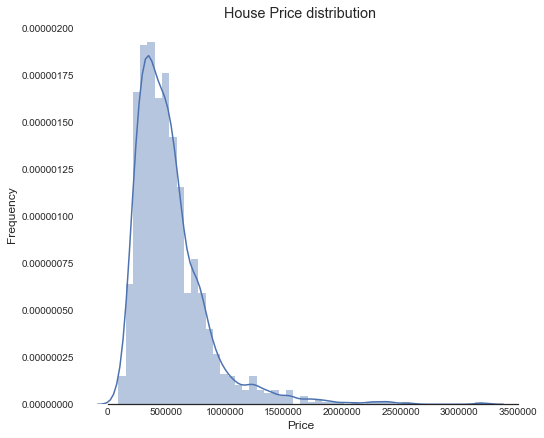

In [4]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(y, color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Price")
ax.set(title="House Price distribution")
sns.despine(trim=True, left=True)
plt.show()

Text(0,0.5,'weights')

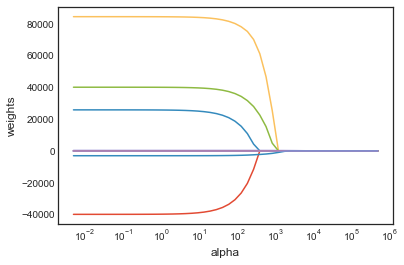

In [5]:
#lasso
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
alphas = 10**np.linspace(6,-2,50)*0.5
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [6]:
lassocv = LassoCV(alphas=None, cv=10, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
trainscore=lassocv.score(X_train,y_train)
print(trainscore)
testscore=lassocv.score(X_test,y_test)
print(testscore)
print("mse = ",mean_squared_error(y_test, lasso.predict(X_test)))
coeff_used = np.sum(lassocv.coef_!=0)
print ("number of features used: ", coeff_used)
print("best model coefficients:")
pd.Series(lassocv.coef_, index=X.columns)

Alpha= 116.067423929
0.588169439524
0.514614729341
mse =  53065306778.1
number of features used:  8
best model coefficients:


bedrooms        -27818.316592
bathrooms        16470.698197
sqft_living        249.851382
sqft_lot            -0.459341
floors           78757.612990
condition        34822.877934
sqft_above           2.385160
sqft_basement        0.000000
yr_built         -2814.926495
yr                   0.000000
dtype: float64

In [7]:
lasso = Lasso()
lasso.fit(X_train, y_train)

trainscore=lasso.score(X_train,y_train)
print(trainscore)
testscore=lasso.score(X_test,y_test)
print(testscore)
print("mse = ",mean_squared_error(y_test, lasso.predict(X_test)))
coeff_used = np.sum(lasso.coef_!=0)
print ("number of features used: ", coeff_used)
print("best model coefficients:")
pd.Series(lasso.coef_, index=X.columns)

0.589570974226
0.517493243437
mse =  53065220759.0
number of features used:  10
best model coefficients:


bedrooms        -3.998322e+04
bathrooms        2.581437e+04
sqft_living      2.668283e+02
sqft_lot        -5.479500e-01
floors           8.450499e+04
condition        4.007884e+04
sqft_above      -6.687479e+00
sqft_basement   -1.287340e+01
yr_built        -3.062808e+03
yr               3.994332e-11
dtype: float64

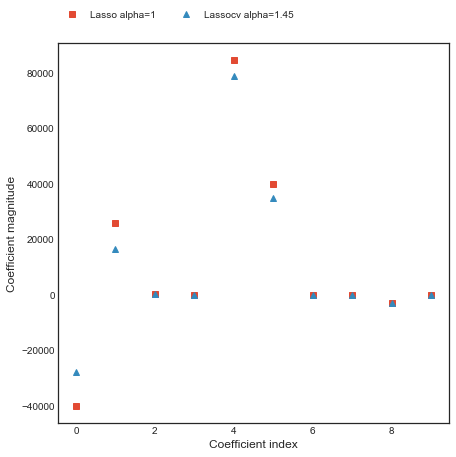

In [8]:
plt.figure(figsize = (7,7))
plt.plot(lasso.coef_,'s',label = "Lasso alpha=1")
plt.plot(lassocv.coef_,'^',label = "Lassocv alpha=1.45")
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend(ncol=2,loc=(0,1.05))
plt.show()

Text(0,0.5,'weights')

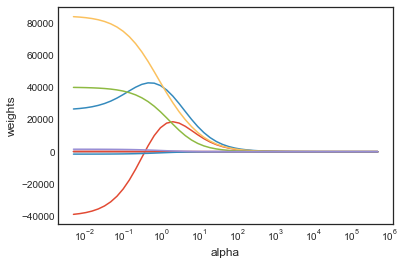

In [9]:
#Ridge
alphas = 10**np.linspace(6,-2,50)*0.5
ridge = Ridge(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [10]:
ridgecv = RidgeCV(alphas=alphas, cv=10, normalize=True)
ridgecv.fit(X_train, y_train)
ridge.set_params(alpha=ridgecv.alpha_)
print("Alpha=", ridgecv.alpha_)
trainscore=ridgecv.score(X_train,y_train)
print(trainscore)
testscore=ridgecv.score(X_test,y_test)
print(testscore)
print("mse = ",mean_squared_error(y_test, ridge.predict(X_test)))
coeff_used = np.sum(ridgecv.coef_!=0)
print ("number of features used: ", coeff_used)
print("best model coefficients:")
pd.Series(ridgecv.coef_, index=X.columns)

Alpha= 0.0694747747187
0.587501540535
0.510325445792
mse =  53115631799.2
number of features used:  10
best model coefficients:


bedrooms        -27729.662530
bathrooms        33307.081374
sqft_living        116.762049
sqft_lot            -0.466661
floors           77496.641193
condition        38393.944272
sqft_above         121.339983
sqft_basement      117.186519
yr_built         -1434.459670
yr                1434.459670
dtype: float64

In [11]:
ridge = Ridge()
ridge.fit(X_train, y_train)

trainscore=ridge.score(X_train,y_train)
print(trainscore)
testscore=ridge.score(X_test,y_test)
print(testscore)
print("mse = ",mean_squared_error(y_test, ridge.predict(X_test)))
coeff_used = np.sum(ridge.coef_!=0)
print ("number of features used: ", coeff_used)
print("best model coefficients:")
pd.Series(ridge.coef_, index=X.columns)


0.589570142497
0.517575264203
mse =  53056200263.5
number of features used:  10
best model coefficients:


bedrooms        -39864.243181
bathrooms        25778.518619
sqft_living        171.350013
sqft_lot            -0.548133
floors           83915.012894
condition        39873.383903
sqft_above          88.899955
sqft_basement       82.450015
yr_built         -1530.463532
yr                1530.463532
dtype: float64

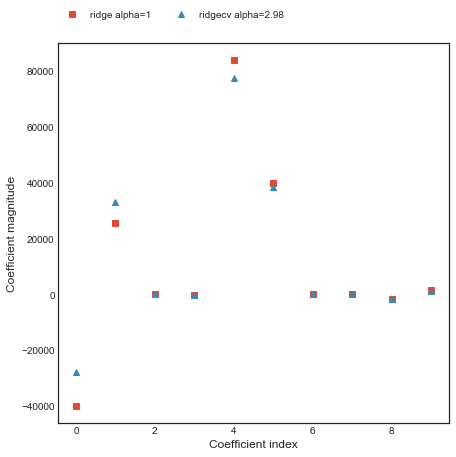

In [12]:
plt.figure(figsize = (7,7))
plt.plot(ridge.coef_,'s',label = "ridge alpha=1")
plt.plot(ridgecv.coef_,'^',label = "ridgecv alpha=2.98")
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend(ncol=2,loc=(0,1.05))
plt.show()

In [13]:
from sklearn.linear_model import ElasticNet

els_reg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
els_reg.fit(X_train,y_train)
print('Accuracy of training data :',np.round(els_reg.score(X_train,y_train)*100,2))
print('Accuracy of testing data :',np.round(els_reg.score(X_test,y_test)*100,2))
pd.Series(els_reg.coef_, index=X.columns)

Accuracy of training data : 57.8
Accuracy of testing data : 51.47


bedrooms        -18086.914605
bathrooms        10436.240667
sqft_living        261.236198
sqft_lot            -0.558045
floors           23686.158887
condition        13701.072647
sqft_above          10.730636
sqft_basement      -21.769790
yr_built         -1870.418131
yr                 938.895458
dtype: float64

In [14]:
predict_els = els_reg.predict(X_test)
from sklearn import metrics
print('mean square error for ElasticNet for Test Data:')
np.round(metrics.mean_squared_error(y_test,predict_els),2)

mean square error for ElasticNet for Test Data:


53371599312.07

In [15]:
from sklearn.linear_model import ElasticNetCV
els_regcv = ElasticNetCV(alphas=alphas, cv=10, normalize=True)
els_regcv.fit(X_train,y_train)
print(els_regcv.alpha_)
print(els_regcv.l1_ratio_)
print('Accuracy of training data :',np.round(els_regcv.score(X_train,y_train)*100,2))
print('Accuracy of testing data :',np.round(els_regcv.score(X_test,y_test)*100,2))
pd.Series(els_regcv.coef_, index=X.columns)

0.005
0.5
Accuracy of training data : 44.26
Accuracy of testing data : 36.87


bedrooms         18585.407737
bathrooms        35389.087329
sqft_living         51.573750
sqft_lot            -0.018739
floors           31601.598996
condition        17875.704264
sqft_above          51.580593
sqft_basement       58.262144
yr_built          -466.338310
yr                 466.338301
dtype: float64

In [16]:
predict_elscv = els_regcv.predict(X_test)
print('mean square error for ElasticNetCV for Test Data:')
np.round(metrics.mean_squared_error(y_test,predict_elscv),2)

mean square error for ElasticNetCV for Test Data:


69430428766.919998

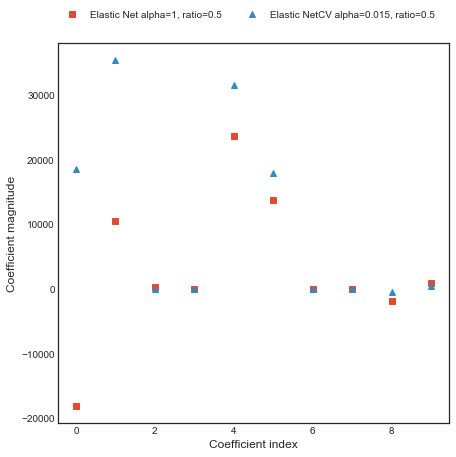

In [17]:
plt.figure(figsize = (7,7))
plt.plot(els_reg.coef_,'s',label = "Elastic Net alpha=1, ratio=0.5")
plt.plot(els_regcv.coef_,'^',label = "Elastic NetCV alpha=0.015, ratio=0.5")
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend(ncol=2,loc=(0,1.05))
plt.show()

In [18]:
### PCA

In [19]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [20]:
pca = PCA()
X_train_reduced = pca.fit_transform(scale(X_train))
X_test_reduced = pca.fit_transform(scale(X_test))
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.222647,0.436636,-0.208060,0.099242,0.055287,0.784430
1,0.412036,0.201619,-0.171876,-0.094407,-0.057435,-0.274687
2,0.398616,0.348866,0.058658,0.134214,0.074278,-0.209765
3,0.114560,0.105702,0.912043,0.007748,-0.082909,0.019791
4,0.305836,-0.277877,-0.257149,0.380584,-0.149820,-0.292832


(-1, 19.949999999999999)

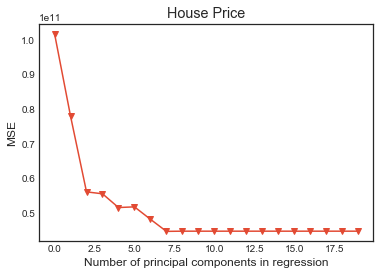

In [21]:
from sklearn import model_selection
# 10-fold CV, with shuffle
n = len(X_train_reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_train_reduced[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('House Price')
plt.xlim(xmin=-1)

(-1, 19.949999999999999)

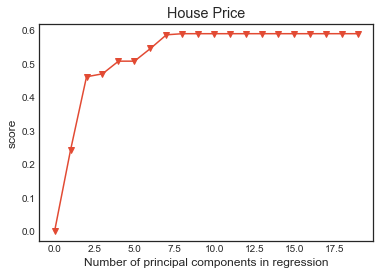

In [22]:
from sklearn import model_selection
# 10-fold CV, with shuffle
n = len(X_train_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

clf = LinearRegression()
accuracy = []

# Calculate score with only the intercept (no principal components in regression)
clf.fit(np.ones((n,1)), y_train.ravel())
acc_score = clf.score(np.ones((n,1)), y_train.ravel())
accuracy.append(acc_score)

# Calculate score using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    clf.fit(X_train_reduced[:,:i], y_train.ravel())
    acc_score = clf.score(X_train_reduced[:,:i], y_train.ravel())
    accuracy.append(acc_score)
    
# Plot results    
plt.plot(accuracy, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('score')
plt.title('House Price')
plt.xlim(xmin=-1)

In [23]:
clf.fit(X_train_reduced[:,:2], y_train.ravel())
print(-1*model_selection.cross_val_score(regr, X_train_reduced[:,:2], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean())
print(clf.score(X_train_reduced[:,:2], y_train.ravel()))

56051950330.4
0.461108423114


In [24]:
clf.fit(X_train_reduced[:,:16], y_train.ravel())
print(-1*model_selection.cross_val_score(regr, X_train_reduced[:,:16], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean())
print(clf.score(X_train_reduced[:,:16], y_train.ravel()))

44685702998.9
0.589570974376


In [25]:
clf.fit(X_test_reduced[:,:16], y_test.ravel())
print(-1*model_selection.cross_val_score(regr, X_test_reduced[:,:16], y_test.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean())
print(clf.score(X_test_reduced[:,:16], y_test.ravel()))

54834294479.5
0.534426610843


In [26]:
### We see that the smallest cross-validation error occurs when M=16 components are used. This is barely fewer than M=19 , which amounts to simply performing least squares, because when all of the components are used in PCR no dimension reduction occurs. However, from the plot we also see that the cross-validation error is roughly the same when only one component is included in the model. This suggests that a model that uses just a small number of components might suffice.

In [27]:
### SVM

In [28]:
from sklearn.svm import SVR

In [ ]:
regressor=SVR(kernel='linear',degree=1)

regressor.fit(X_train,y_train)
print(regressor.score(X_train,y_train))
pred=regressor.predict(X_test)
print(regressor.score(X_test,y_test))

In [ ]:
regressor=SVR(kernel='poly',degree=1)

regressor.fit(X_train,y_train)
print(regressor.score(X_train,y_train))
pred=regressor.predict(X_test)
print(regressor.score(X_test,y_test))

In [ ]:
regressor=SVR(kernel='rbf',degree=1)

regressor.fit(X_train,y_train)
print(regressor.score(X_train,y_train))
pred=regressor.predict(X_test)
print(regressor.score(X_test,y_test))

In [ ]:
regressor=SVR(kernel='sigmoid',degree=1)

regressor.fit(X_train,y_train)
print(regressor.score(X_train,y_train))
pred=regressor.predict(X_test)
print(regressor.score(X_test,y_test))